### Import Library

In [1]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from IPython.display import display

### Load Dataset

In [ ]:
dataset_path = r"data\dataset.txt"
df = pd.read_csv(dataset_path, delimiter='\t')

### Exploratory Data Analysis (EDA)

In [3]:
df.head()

,t (s),TH-IN,T-HT,TH-OUT,T-HOT LEG,TA,TC-IN,T-CTB OUT,T-CT,T- CTB IN,TC-OUT,T-COLD LEG,TB,T-AIR,T-iSO1,T-iSO2
0,0,23.93,27.54,24.90,24.981538,25.344993,25.93,16.494643,15.9,16.085691,22.89,22.961715,24.123676,27.277591,28.286037,27.928758
1,1,23.93,27.54,24.90,24.981538,25.344993,25.93,16.494643,15.9,16.085691,22.89,22.961715,24.123676,27.277591,28.286037,27.928758
2,2,23.94,27.55,24.91,24.997826,25.361506,25.93,16.499692,15.9,16.103291,22.92,22.964195,24.131001,27.295456,28.284092,27.941781
3,3,23.94,27.55,24.91,24.997826,25.361506,25.93,16.499692,15.9,16.103291,22.92,22.964195,24.131001,27.295456,28.284092,27.941781
4,4,23.94,27.55,24.90,24.983867,25.357697,25.93,16.508891,15.9,16.100641,22.91,22.994142,24.096513,27.281296,28.284503,27.934991


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11001 entries, 0 to 11000
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   t (s)       11001 non-null  int64  
 1   TH-IN       11001 non-null  float64
 2   T-HT        11001 non-null  float64
 3   TH-OUT      11001 non-null  float64
 4   T-HOT LEG   11001 non-null  float64
 5   TA          11001 non-null  float64
 6   TC-IN       11001 non-null  float64
 7   T-CTB OUT   11001 non-null  float64
 8   T-CT        11001 non-null  float64
 9   T- CTB IN   11001 non-null  float64
 10  TC-OUT      11001 non-null  float64
 11  T-COLD LEG  11001 non-null  float64
 12  TB          11001 non-null  float64
 13  T-AIR       11001 non-null  float64
 14  T-iSO1      11001 non-null  float64
 15  T-iSO2      11001 non-null  float64
dtypes: float64(15), int64(1)
memory usage: 1.3 MB


In [ ]:
df.describe()

+------------+---------+--------------------+--------------------+-----------+-----------+-----------+-----------+-----------+
|            |  count  |        mean        |        std         |    min    |    25%    |    50%    |    75%    |    max    |
+------------+---------+--------------------+--------------------+-----------+-----------+-----------+-----------+-----------+
|   t (s)    | 11001.0 |       5500.0       | 3175.859489964882  |    0.0    |  2750.0   |  5500.0   |  8250.0   |  11000.0  |
|   TH-IN    | 11001.0 | 38.12166348513772  | 7.846051896325843  |   23.05   |   32.24   |   41.09   |   44.74   |   46.27   |
|    T-HT    | 11001.0 | 75.27722207072084  | 16.965042313551393 |   27.52   |   66.79   |   82.48   |   88.3    |   90.84   |
|   TH-OUT   | 11001.0 | 43.55457685664939  | 8.483529467338824  |   24.73   |   37.59   |   46.85   |   50.56   |   52.51   |
| T-HOT LEG  | 11001.0 | 42.47149290600855  | 8.506501266742267  | 24.656151 | 36.566724 | 45.901248 | 49.47147

### Data Preprocessing

In [6]:
#Penanganan Missing Value
display(df.isnull().sum())
df.dropna(inplace=True)

t (s)         0
TH-IN         0
T-HT          0
TH-OUT        0
T-HOT LEG     0
TA            0
TC-IN         0
T-CTB OUT     0
T-CT          0
T- CTB IN     0
TC-OUT        0
T-COLD LEG    0
TB            0
T-AIR         0
T-iSO1        0
T-iSO2        0
dtype: int64

In [7]:
display(df.isnull().sum())

t (s)         0
TH-IN         0
T-HT          0
TH-OUT        0
T-HOT LEG     0
TA            0
TC-IN         0
T-CTB OUT     0
T-CT          0
T- CTB IN     0
TC-OUT        0
T-COLD LEG    0
TB            0
T-AIR         0
T-iSO1        0
T-iSO2        0
dtype: int64

In [8]:
# Konversi tipe dari ke numerik
def convert_numeric(df):
    df = df.apply(pd.to_numeric, errors='coerce')
    return df

cleaned_df = convert_numeric(df)
cleaned_df.to_csv("cleaned_dataset.csv", index=False)

### Feature Selection

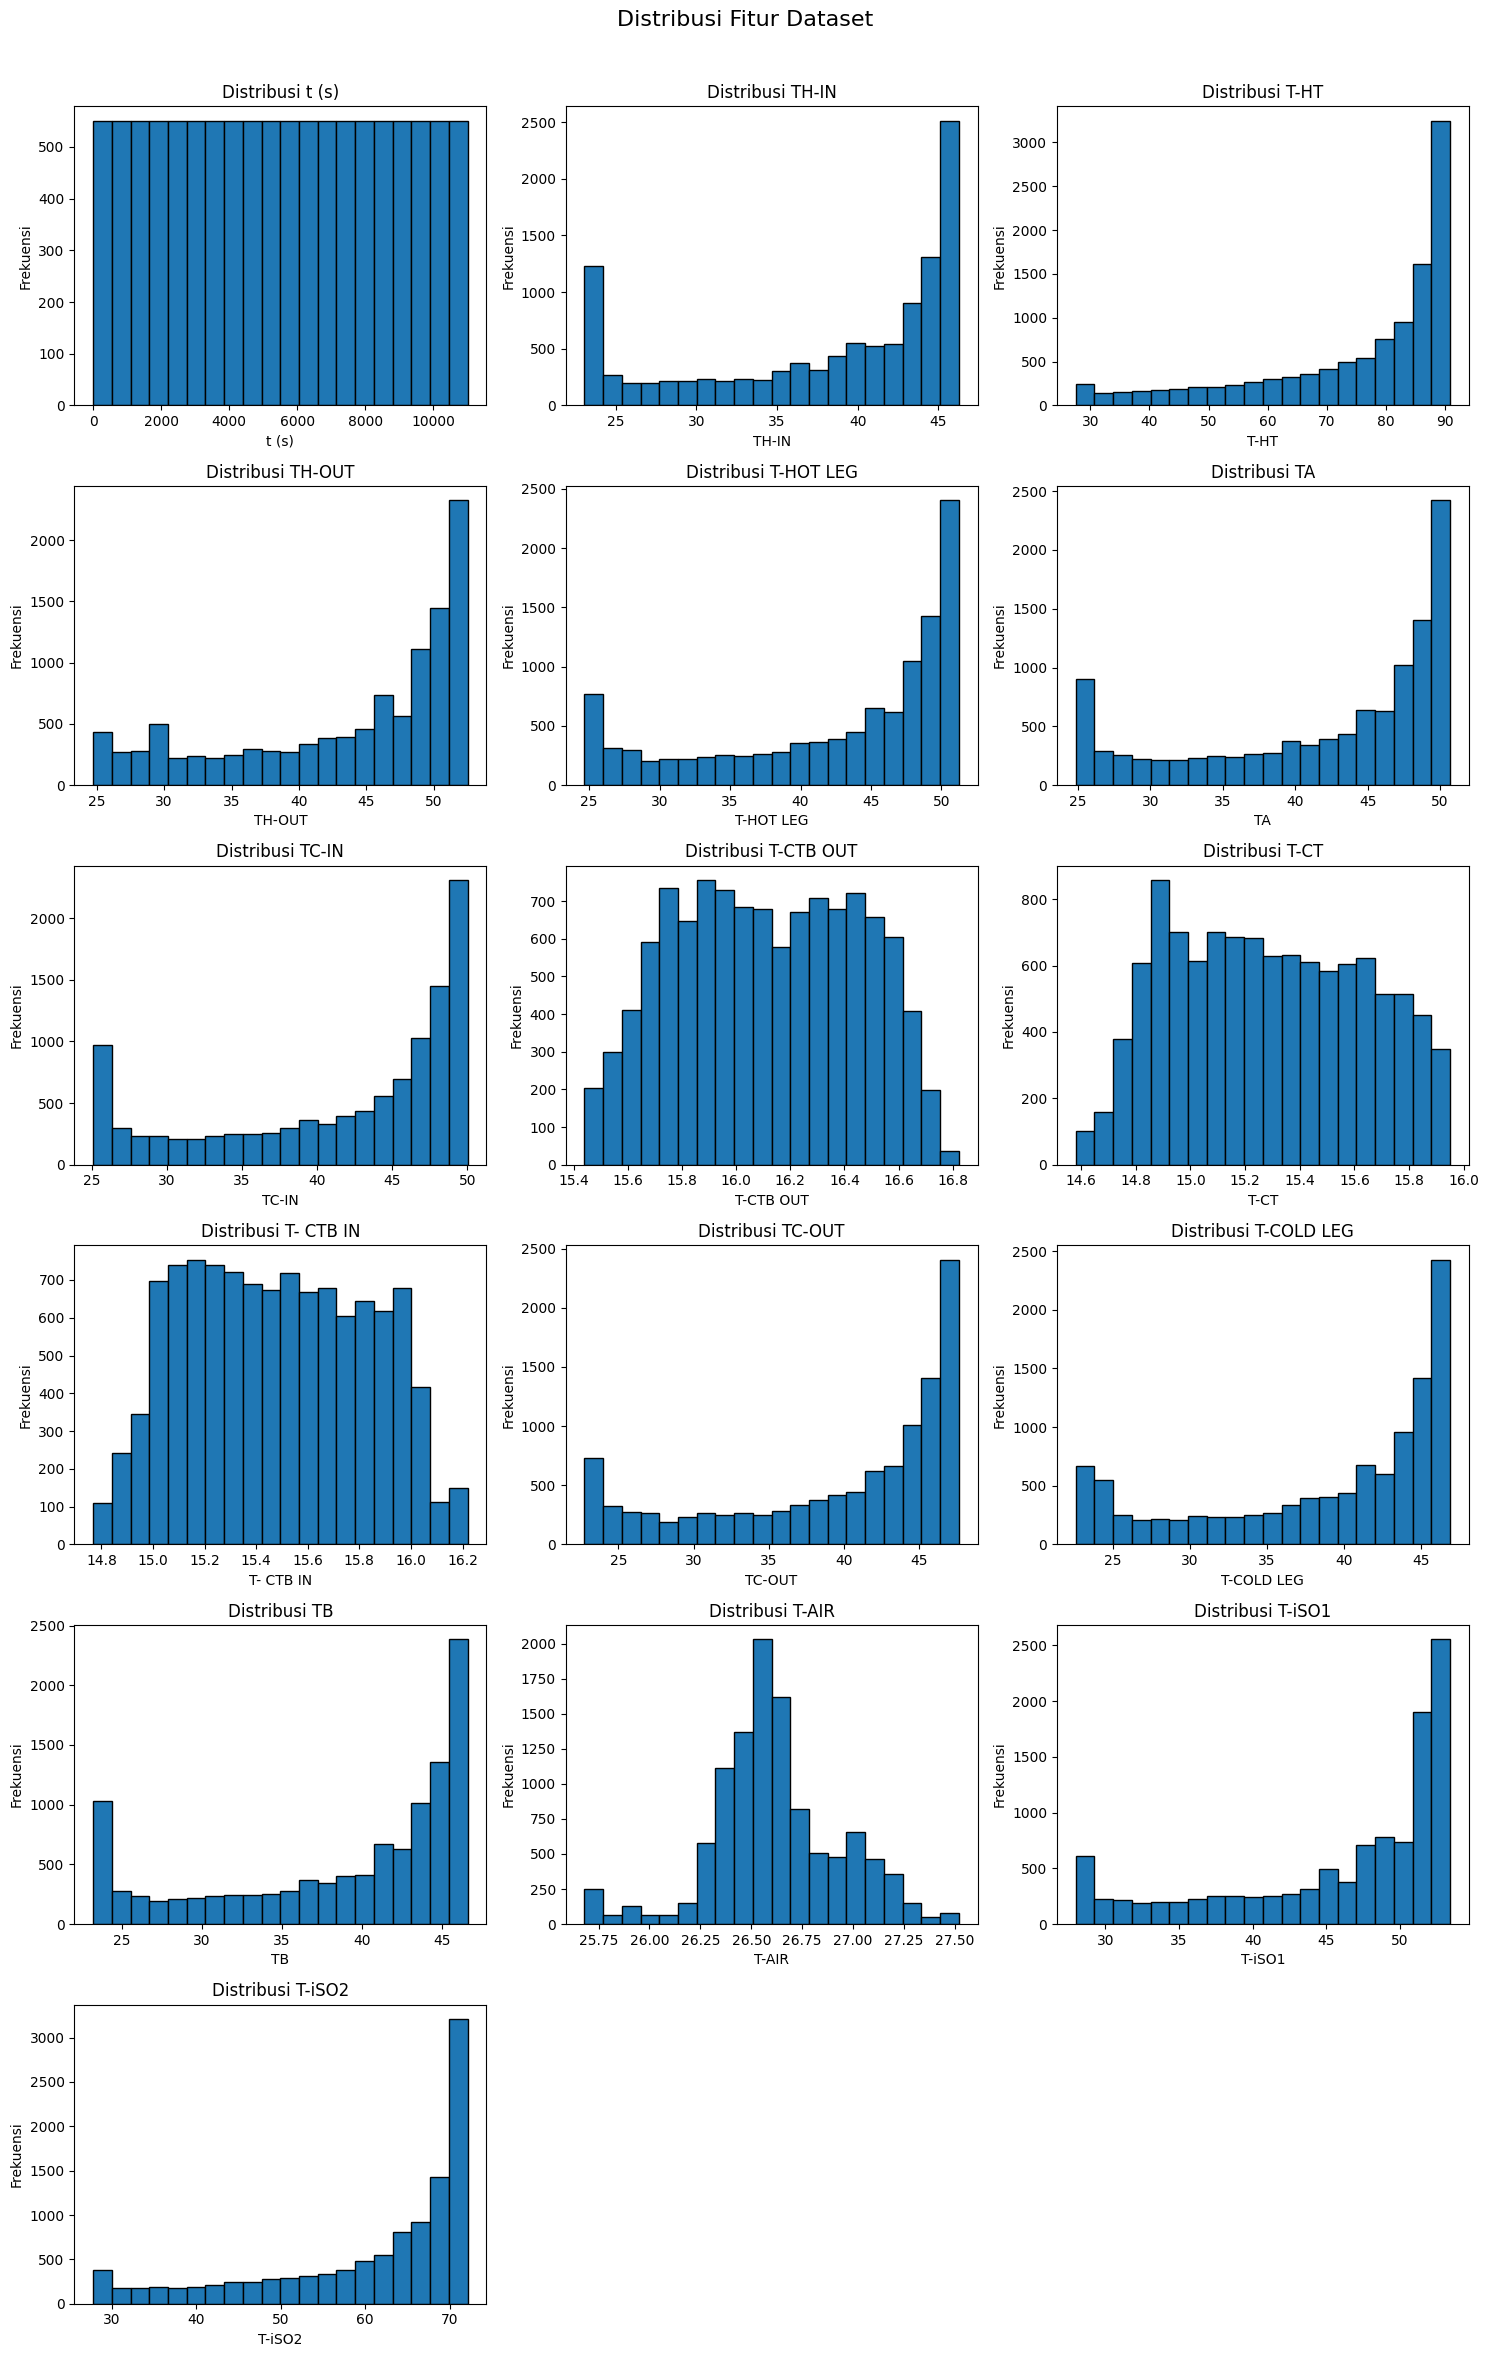

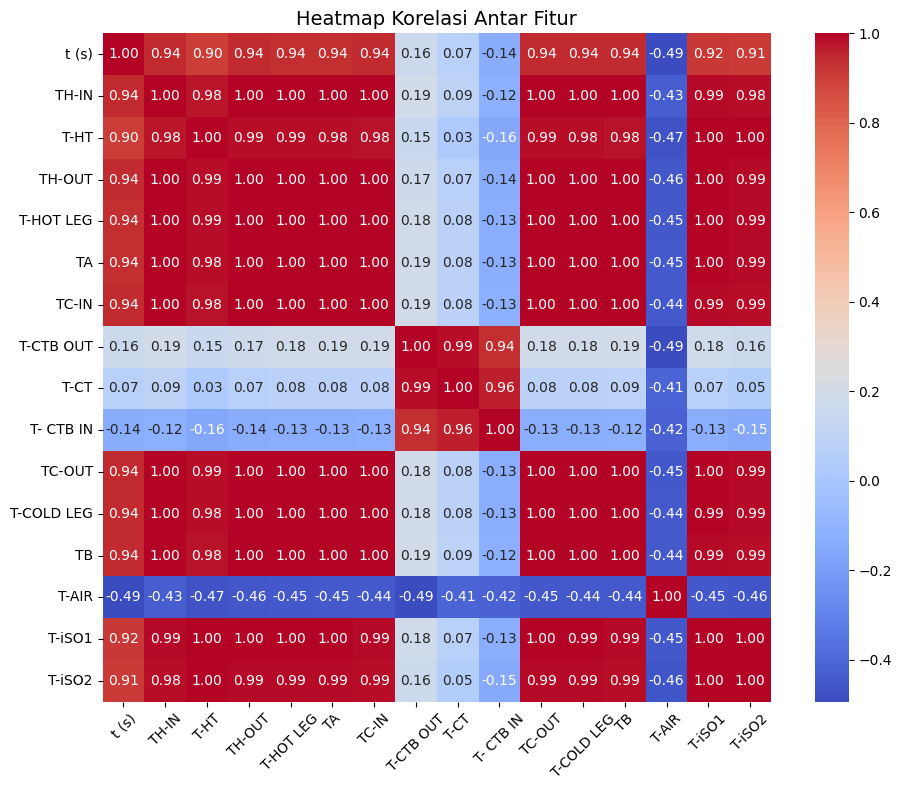

In [ ]:
# Heatmap correlation
plt.figure(figsize=(10, 8))
sns.heatmap(cleaned_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Heatmap Korelasi Antar Fitur", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Memilih Target & Fitur

In [ ]:
def select_features(df):
    X = df[['t (s)', 'T-iSO2']]  
    y = df['T-iSO1'] 

    return X, y


X, y = select_features(cleaned_df)

print("Fitur yang digunakan:", X.columns.tolist())
print("Target:", y.name)


Fitur yang digunakan: ['t (s)', 'T-iSO2']
Target: T-iSO1


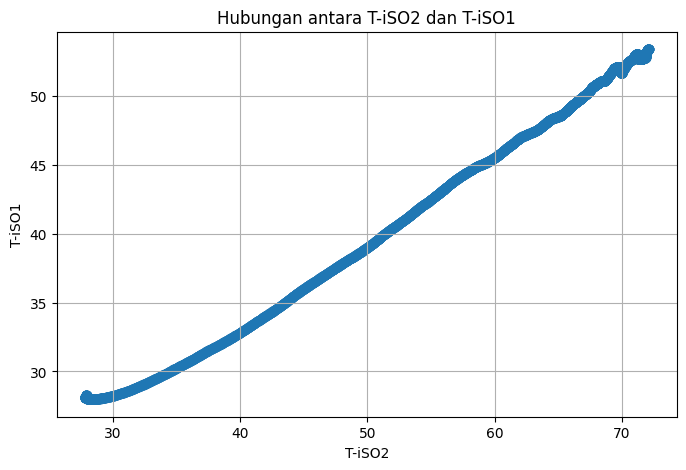

In [11]:
# Scatter plot antara input dan output
plt.figure(figsize=(8, 5))
plt.scatter(cleaned_df['T-iSO2'], cleaned_df['T-iSO1'], alpha=0.5)
plt.xlabel('T-iSO2')
plt.ylabel('T-iSO1')
plt.title('Hubungan antara T-iSO2 dan T-iSO1')
plt.grid()
plt.show()

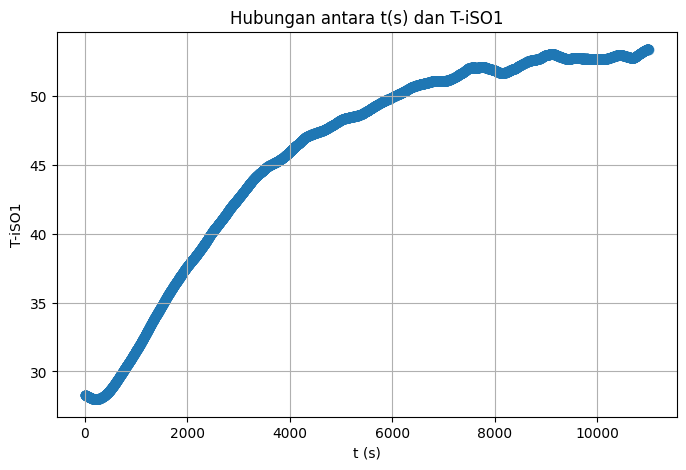

In [54]:
# Scatter plot antara input dan output
plt.figure(figsize=(8, 5))
plt.scatter(cleaned_df['t (s)'], cleaned_df['T-iSO1'], alpha=0.5)
plt.xlabel('t (s)')
plt.ylabel('T-iSO1')
plt.title('Hubungan antara t(s) dan T-iSO1')
plt.grid()
plt.show()

### Splitting Data (Train 80% - Test 20%)

In [12]:
def train_test_split(data, test_size=0.2):
    split_idx = int(len(data) * (1 - test_size))
    return data[:split_idx, :], data[split_idx:, :]

In [13]:
def series_to_supervised(df):
    supervised_df = df[['t (s)', 'T-iSO2', 'T-iSO1']].copy()
    return supervised_df

supervised_df = series_to_supervised(cleaned_df)
time_index = df['t (s)'].iloc[len(df) - len(supervised_df):].values.astype(float)
data = supervised_df.values

### Pengembangan Model

In [14]:
def random_forest_forecast(train, testX):
    train = np.array(train)
    trainX, trainy = train[:, :-1], train[:, -1]

    model = RandomForestRegressor(n_estimators=50, max_depth=10, min_samples_split=10, max_features='sqrt', random_state=42)
    model.fit(trainX, trainy)

    yhat = model.predict([testX])
    return yhat[0], model

In [15]:
def decision_tree_forecast(train, testX):
    train = np.array(train)
    trainX, trainy = train[:, :-1], train[:, -1]

    model = DecisionTreeRegressor(max_depth=10, random_state=42)
    model.fit(trainX, trainy)

    yhat = model.predict([testX])
    return yhat[0], model

### Walk-forward Validation (Training & Testing)

In [16]:
def walk_forward_validation(data, test_size=0.2, use_decision_tree=False):
    predictions = []
    train, test = train_test_split(data, test_size)
    history = [x for x in train]

    model = None
    for i in range(len(test)):
        if i % 10 == 0:
            print(f"Processing test data index {i}/{len(test)}...")
        testX, testy = test[i, :-1], test[i, -1]

        if use_decision_tree:
            yhat, model = decision_tree_forecast(history, testX)
        else:
            yhat, model = random_forest_forecast(history, testX)

        predictions.append(yhat)
        history.append(test[i])

    mae = mean_absolute_error(test[:, -1], predictions)
    mse = mean_squared_error(test[:, -1], predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(test[:, -1], predictions)
    return mae, mse, rmse, r2, test[:, -1], predictions, model, time_index[-len(test):]


### Matrix Evaluation

In [ ]:
mae_rf, mse_rf, rmse_rf, 
r2_rf, y_rf, yhat_rf, trained_model_rf, 
test_time_rf = walk_forward_validation(data, test_size=0.2, use_decision_tree=False)

Processing test data index 0/2201...
Processing test data index 10/2201...
Processing test data index 20/2201...
Processing test data index 30/2201...
Processing test data index 40/2201...
Processing test data index 50/2201...
Processing test data index 60/2201...
Processing test data index 70/2201...
Processing test data index 80/2201...
Processing test data index 90/2201...
Processing test data index 100/2201...
Processing test data index 110/2201...
Processing test data index 120/2201...
Processing test data index 130/2201...
Processing test data index 140/2201...
Processing test data index 150/2201...
Processing test data index 160/2201...
Processing test data index 170/2201...
Processing test data index 180/2201...
Processing test data index 190/2201...
Processing test data index 200/2201...
Processing test data index 210/2201...
Processing test data index 220/2201...
Processing test data index 230/2201...
Processing test data index 240/2201...
Processing test data index 250/2201.

In [ ]:
mae_dt, mse_dt, rmse_dt, 
r2_dt, y_dt, yhat_dt, trained_model_dt, 
test_time_dt = walk_forward_validation(data, test_size=0.2, use_decision_tree=True)

Processing test data index 0/2201...
Processing test data index 10/2201...
Processing test data index 20/2201...
Processing test data index 30/2201...
Processing test data index 40/2201...
Processing test data index 50/2201...
Processing test data index 60/2201...
Processing test data index 70/2201...
Processing test data index 80/2201...
Processing test data index 90/2201...
Processing test data index 100/2201...
Processing test data index 110/2201...
Processing test data index 120/2201...
Processing test data index 130/2201...
Processing test data index 140/2201...
Processing test data index 150/2201...
Processing test data index 160/2201...
Processing test data index 170/2201...
Processing test data index 180/2201...
Processing test data index 190/2201...
Processing test data index 200/2201...
Processing test data index 210/2201...
Processing test data index 220/2201...
Processing test data index 230/2201...
Processing test data index 240/2201...
Processing test data index 250/2201.

In [41]:
rf_model_filename = "random_forest_model.pkl"
dt_model_filename = "decision_tree_model.pkl"
joblib.dump(trained_model_rf, rf_model_filename)
joblib.dump(trained_model_dt, dt_model_filename)

print(f"Random Forest Model saved as {rf_model_filename}")
print(f"Decision Tree Model saved as {dt_model_filename}")

Random Forest Model saved as random_forest_model.pkl
Decision Tree Model saved as decision_tree_model.pkl


In [ ]:
results_df = pd.DataFrame({
    "Model": ["Random Forest", "Decision Tree"],
    "MAE": [mae_rf, mae_dt],
    "MSE": [mse_rf, mse_dt],
    "RMSE": [rmse_rf, rmse_dt],
    "R²": [r2_rf, r2_dt]
})

display(results_df)
results_df.to_csv("model_results_trimmed.csv", index=False)


,Model,MAE,MSE,RMSE,R²
0,Random Forest,0.013640,0.000373,0.019312,0.986877
1,Decision Tree,0.009225,0.000148,0.012160,0.994797


### Visualization

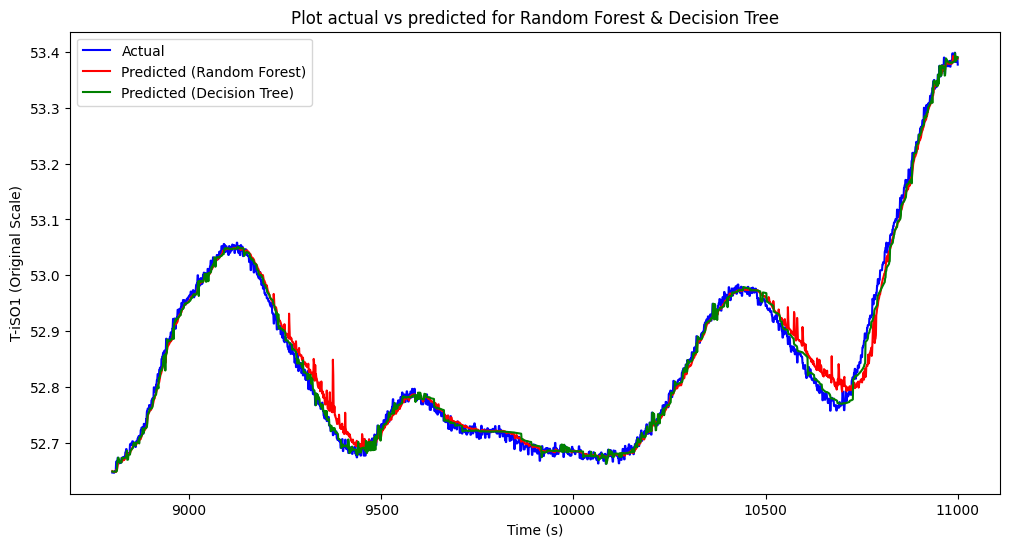

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(test_time_rf, y_rf, label='Actual', color='blue')
plt.plot(test_time_rf, yhat_rf, label='Predicted (Random Forest)', color='red')
plt.plot(test_time_dt, yhat_dt, label='Predicted (Decision Tree)', color='green')
plt.title('Plot actual vs predicted for Random Forest & Decision Tree')
plt.xlabel('Time (s)')
plt.ylabel('T-iSO1 (Original Scale)')
plt.legend()
plt.show()


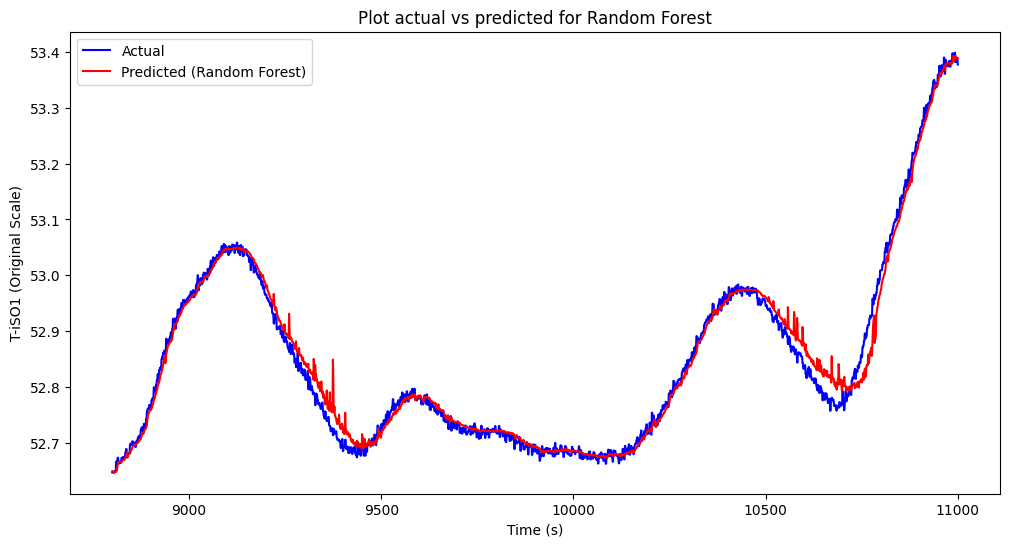

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(test_time_rf, y_rf, label='Actual', color='blue')
plt.plot(test_time_rf, yhat_rf, label='Predicted (Random Forest)', color='red')
plt.title('Plot actual vs predicted for Random Forest')
plt.xlabel('Time (s)')
plt.ylabel('T-iSO1 (Original Scale)')
plt.legend()
plt.show()


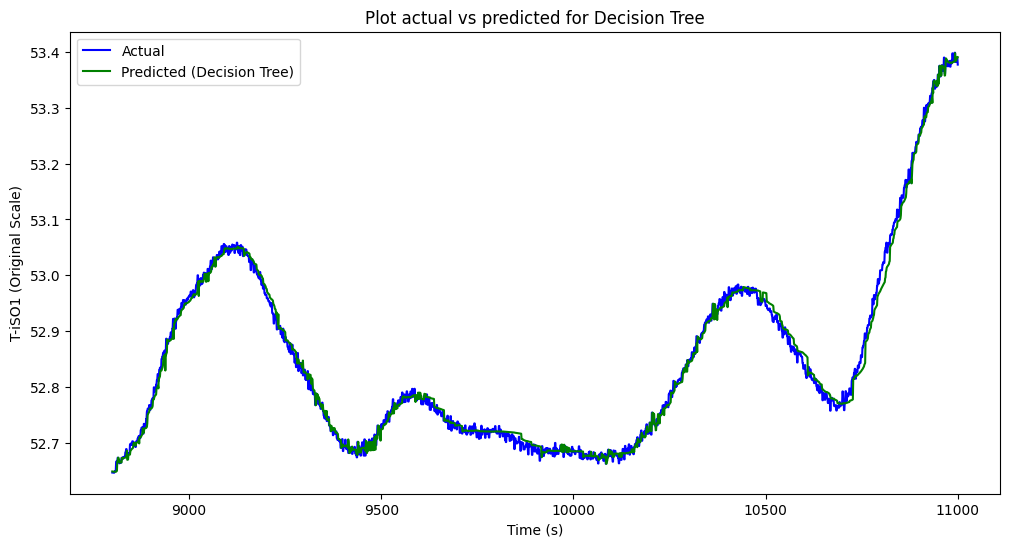

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(test_time_dt, y_dt, label='Actual', color='blue')
plt.plot(test_time_dt, yhat_dt, label='Predicted (Decision Tree)', color='green')
plt.title('Plot actual vs predicted for Decision Tree')
plt.xlabel('Time (s)')
plt.ylabel('T-iSO1 (Original Scale)')
plt.legend()
plt.show()

In [24]:
# Membuat DataFrame hasil prediksi
predictions_df = pd.DataFrame({
    'index': np.arange(len(test_time_rf)),
    't (s)': test_time_rf,
    'Actual_T-iSO1': y_rf,
    'Predicted_T-iSO1_RF': yhat_rf,
    'Predicted_T-iSO1_DT': yhat_dt
})

# Menampilkan sekilas
display(predictions_df.head())

# Simpan ke CSV
predictions_df.to_csv('predictions_rf_dt.csv', index=False)

print("Predictions saved as predictions_rf_dt.csv")


,index,t (s),Actual_T-iSO1,Predicted_T-iSO1_RF,Predicted_T-iSO1_DT
0,0,8800.0,52.647219,52.649705,52.649167
1,1,8801.0,52.647219,52.649286,52.649037
2,2,8802.0,52.647677,52.648897,52.648923
3,3,8803.0,52.647677,52.648529,52.648850
4,4,8804.0,52.646890,52.648465,52.648785


Predictions saved as predictions_rf_dt.csv


### Implementasi Dashboard Berbasis Streamlit

In [1]:
!streamlit run dashboard.py

^C


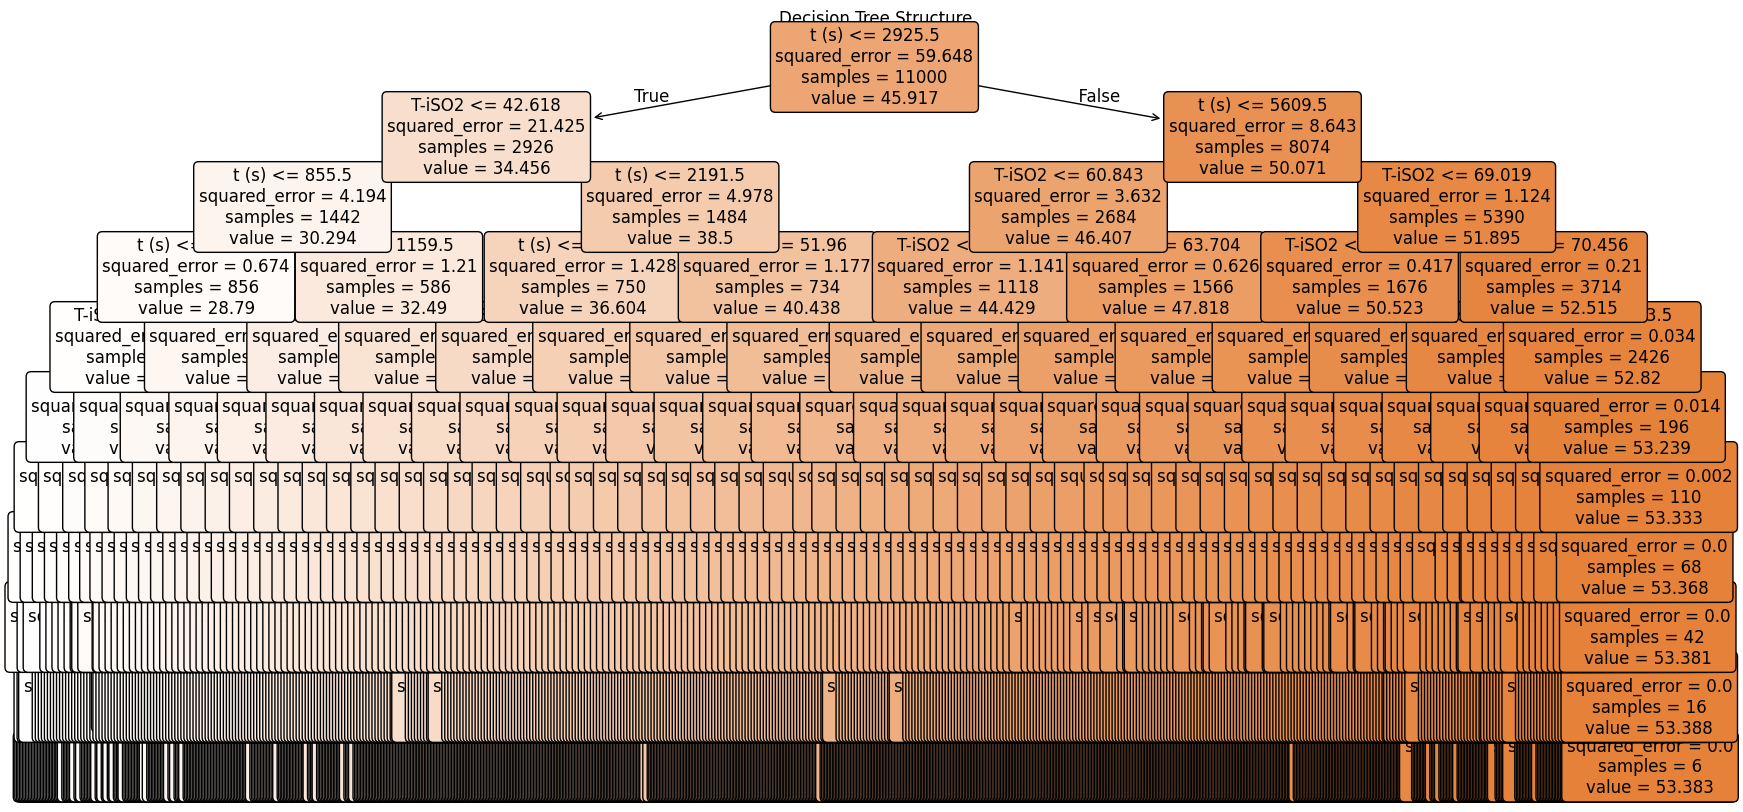

|--- t (s) <= 2925.50
|   |--- T-iSO2 <= 42.62
|   |   |--- t (s) <= 855.50
|   |   |   |--- t (s) <= 571.50
|   |   |   |   |--- T-iSO2 <= 30.66
|   |   |   |   |   |--- T-iSO2 <= 29.88
|   |   |   |   |   |   |--- t (s) <= 87.50
|   |   |   |   |   |   |   |--- t (s) <= 43.50
|   |   |   |   |   |   |   |   |--- t (s) <= 21.50
|   |   |   |   |   |   |   |   |   |--- t (s) <= 7.50
|   |   |   |   |   |   |   |   |   |   |--- value: [28.28]
|   |   |   |   |   |   |   |   |   |--- t (s) >  7.50
|   |   |   |   |   |   |   |   |   |   |--- value: [28.27]
|   |   |   |   |   |   |   |   |--- t (s) >  21.50
|   |   |   |   |   |   |   |   |   |--- t (s) <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- value: [28.25]
|   |   |   |   |   |   |   |   |   |--- t (s) >  29.50
|   |   |   |   |   |   |   |   |   |   |--- value: [28.22]
|   |   |   |   |   |   |   |--- t (s) >  43.50
|   |   |   |   |   |   |   |   |--- t (s) <= 67.50
|   |   |   |   |   |   |   |   |   |--- t (s) <= 51.50

In [30]:
from sklearn.tree import plot_tree

# Visualisasi pohon keputusan untuk Decision Tree
plt.figure(figsize=(20,10))
plot_tree(trained_model_dt, filled=True, feature_names=X.columns, rounded=True, fontsize=12)
plt.title("Decision Tree Structure")
plt.show()

from sklearn.tree import export_text

# Tampilkan aturan dari Decision Tree dalam bentuk teks
tree_rules = export_text(trained_model_dt, feature_names=list(X.columns))
print(tree_rules)


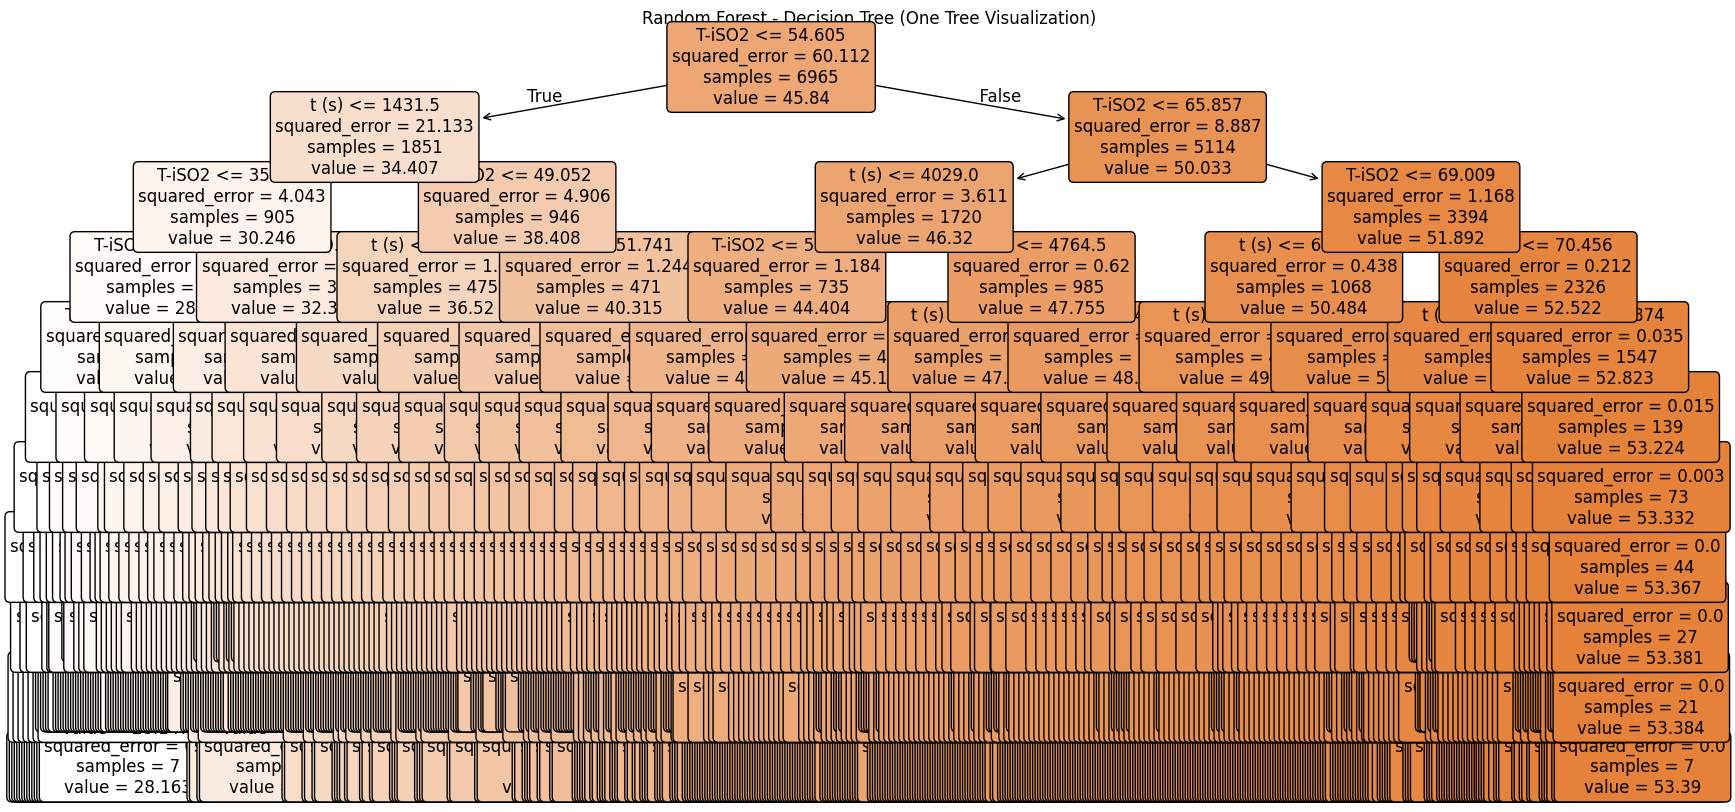

In [31]:
from sklearn.tree import plot_tree

# Mengambil salah satu pohon dari Random Forest untuk divisualisasikan
random_tree = trained_model_rf.estimators_[0]  # Mengambil pohon pertama dari model Random Forest

plt.figure(figsize=(20,10))
plot_tree(random_tree, filled=True, feature_names=X.columns, rounded=True, fontsize=12)
plt.title("Random Forest - Decision Tree (One Tree Visualization)")
plt.show()


In [35]:
# Membuat DataFrame hasil prediksi
predictions_df = pd.DataFrame({
    'index': np.arange(len(test_time_rf)),
    't (s)': test_time_rf,
    'Actual_T-iSO1': y_rf,
    'Predicted_T-iSO1_RF': yhat_rf,
    'Predicted_T-iSO1_DT': yhat_dt
})

# Simpan ke CSV
predictions_df.to_csv('skripsi.csv', index=False)
